<a href="https://colab.research.google.com/github/chetansgode/Yes-bank-stock-closing-price-prediction/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - EDA + Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** - Chetan Gode


# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **GitHub Link -**

https://github.com/chetansgode/Yes-bank-stock-closing-price-prediction.git

# **Problem Statement**


**The main objective is to develop a predictive model to forecast the closing price of Yes Bank's stock for the upcoming months. This will assist investors, analysts, and other stakeholders in making informed decisions about their financial strategies related to Yes Bank.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# import numpy
import numpy as np
# import pandas
import pandas as pd
# import visualisation library
import matplotlib.pyplot as plt
import seaborn as sns
#import ml module
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

df=pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [3]:
# Dataset First Look
# check first 5 row's
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
row,columns=df.shape
print(f"Data set df has no of rows = {row}")
print(f"Data set df has no of columns = {columns}")

Data set df has no of rows = 185
Data set df has no of columns = 5


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_values=df.duplicated().sum()
if duplicate_values == 0:
  print(f'Dataset doesn\'t have duplicate values = {duplicate_values}')
else:
  print(f'Dataset has duplicate values = {duplicate_values}')

Dataset doesn't have duplicate values = 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
none_value=df.isna().sum().sum()
if none_value == 0:
  print(f'Dataset doesn\'t have none values = {none_value}')
else:
  print(f'Dataset has none values = {none_value}')


Dataset doesn't have none values = 0


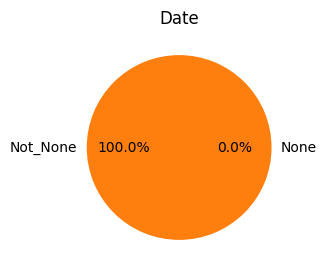

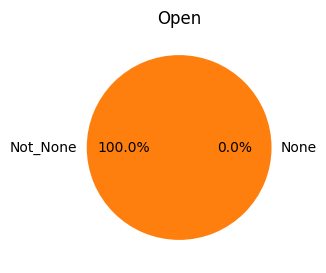

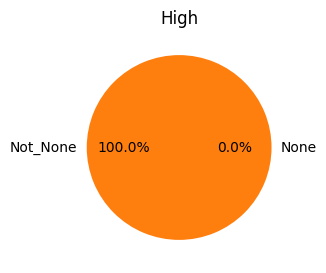

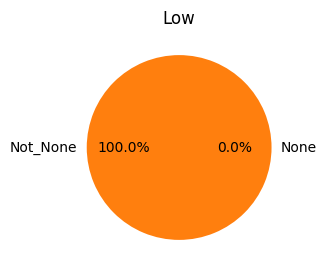

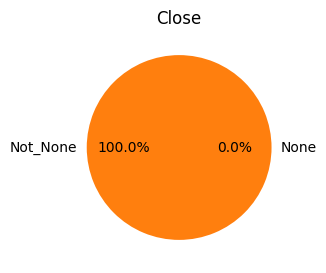

In [8]:
# Visualizing the missing values

for i in df.columns:
  plt.figure(figsize=(3,3))
  labels = ['None', 'Not_None']
  plt.pie([df[i].isna().sum(),df[i].notna().sum()],labels=labels , autopct='%.1f%%')
  plt.title(i )
  plt.show()

### What did you know about your dataset?

* Data set has total 5 variables in between 4 variables are object types Floate and one is in form of object.
* Data set doesn't have any null values
* it doesn't have duplicate values
* it has 185 records available

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print('print columns one by one')
for i in df.columns:
  print(i)

print columns one by one
Date
Open
High
Low
Close


In [10]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

variable      >>> Descriptions
* Date        >>> Date of record
* Open        >>> Opening Price
* High        >>> Highest price in day
* Low         >>> Lowest price in day
* Close       >>> Occuption of speakers

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns:
  a=df[i].nunique()
  print('variable ' + i+ ' has unique value =' ,a)

variable Date has unique value = 185
variable Open has unique value = 183
variable High has unique value = 184
variable Low has unique value = 183
variable Close has unique value = 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# convert form of Date (Object) to Date (Date)
from datetime import datetime
new_year = 2018
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%d').replace(year=new_year))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [13]:
# create new Day variable
df['Day']=df['Date'].dt.strftime('%A')

In [14]:
# Create new variable MonthDay
df['MonthDay'] = df['Date'].dt.strftime('%m-%d')

### What all manipulations have you done and insights you found?

* First of all, changed Date form to Datetime form.
* Create New variable day from Date.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [15]:
# Create dataframe to check min, max, avg price of share with respect to different variable
list_=[]
for i in ['Close','High','Open','Low']:
  a=pd.DataFrame({'Maximum_closing_price':df[i].max(),'Date_Maximum': df.loc[df[i].idxmax(), 'Date'],
                    'Minimum_closing_price':df[i].min(),'Date_Minimum': df.loc[df[i].idxmin(), 'Date'],
                    'Average_closing_price':df[i].mean(),'Date_Average': df.loc[df[i] == df[i].mean(), 'Date']},
                   index=[i])
  list_.append(a)

result_df = pd.concat(list_)
result_df = result_df.rename_axis('Variable')   # index columns naming
result_df


,Maximum_closing_price,Date_Maximum,Minimum_closing_price,Date_Minimum,Average_closing_price,Date_Average
Variable,,,,,,
Close,367.90,2018-07-18,9.98,2018-03-09,105.204703,NaT
High,404.00,2018-08-18,11.24,2018-03-09,116.104324,NaT
Open,369.95,2018-08-18,10.00,2018-03-09,105.541405,NaT
Low,345.50,2018-09-17,5.55,2018-03-20,94.947838,NaT


In [16]:
# above data showing in different formate
for i in ['Close','High','Open','Low']:
  print('for ' + i )
  print(df[i].agg({'mean': 'mean', 'max': 'max','min':'min'}))
  print('---'*10)

for Close
mean    105.204703
max     367.900000
min       9.980000
Name: Close, dtype: float64
------------------------------
for High
mean    116.104324
max     404.000000
min      11.240000
Name: High, dtype: float64
------------------------------
for Open
mean    105.541405
max     369.950000
min      10.000000
Name: Open, dtype: float64
------------------------------
for Low
mean     94.947838
max     345.500000
min       5.550000
Name: Low, dtype: float64
------------------------------


#### Chart - 1 Check  ['Close','High','Open','Low'] vs Date

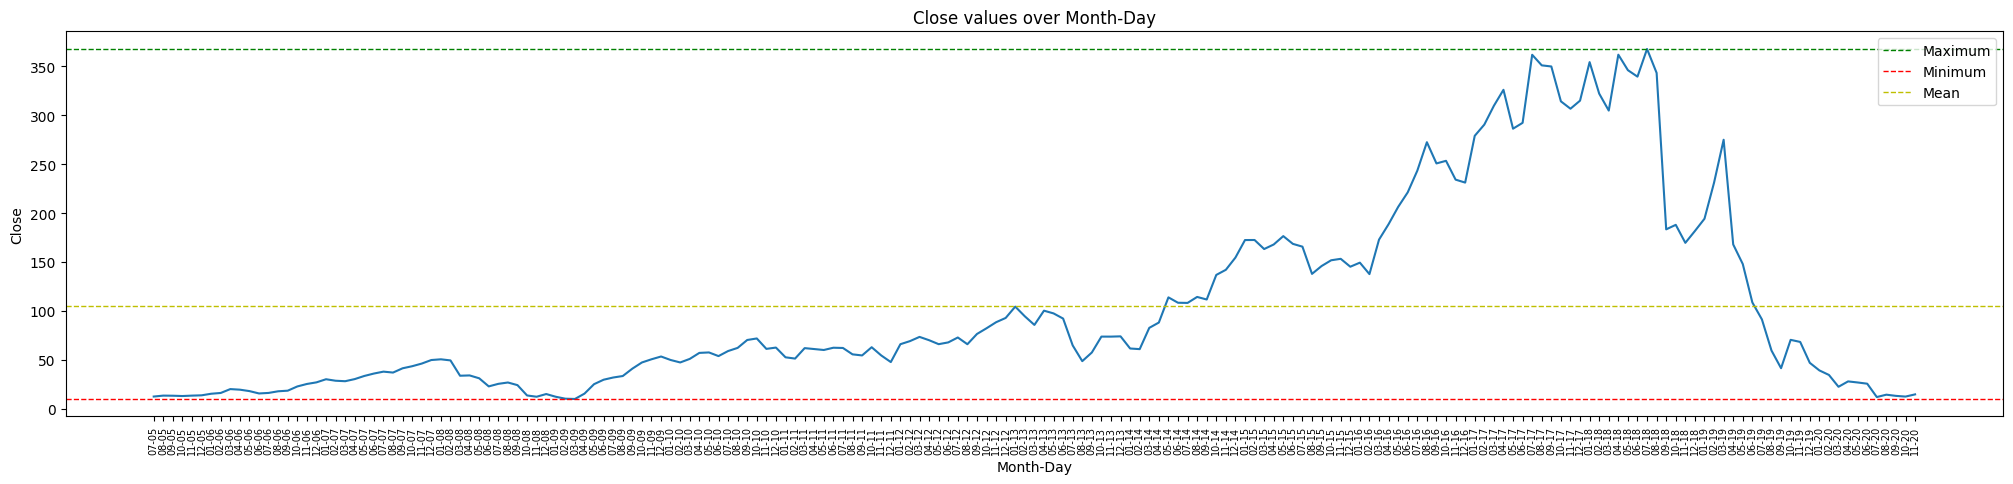

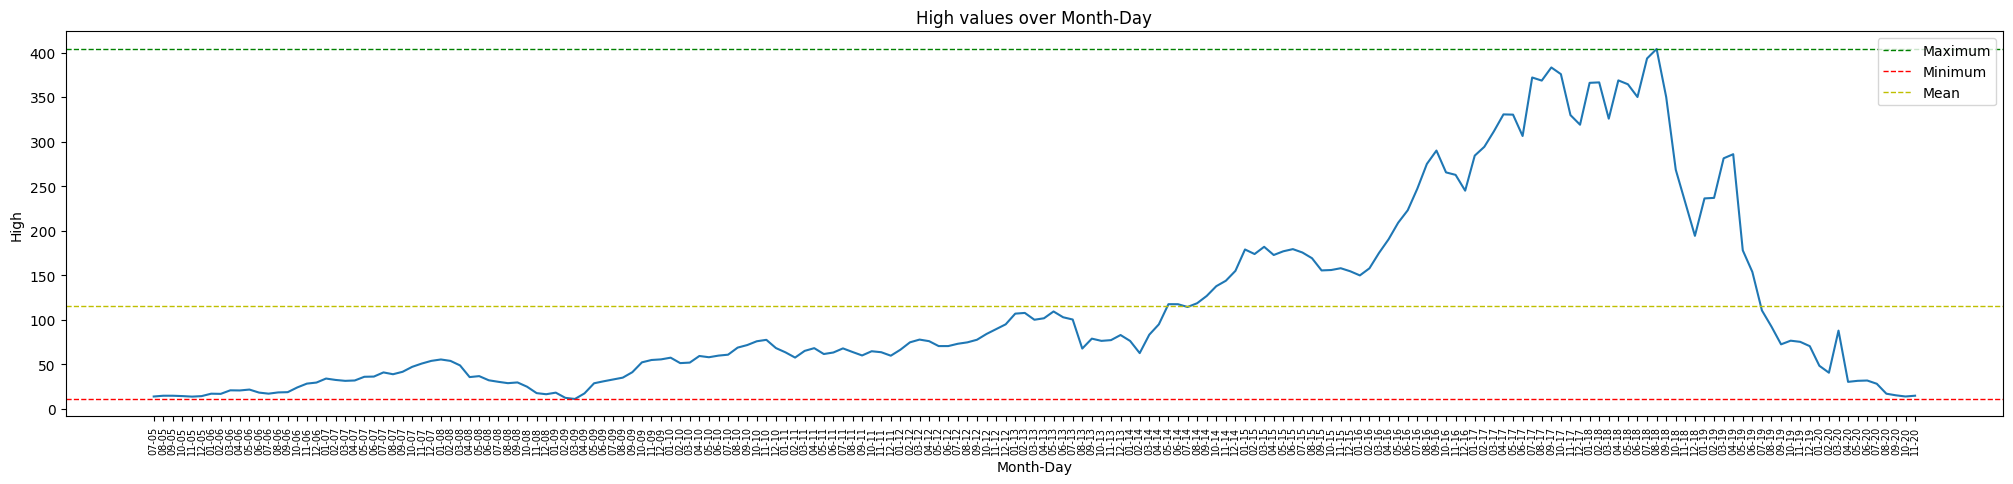

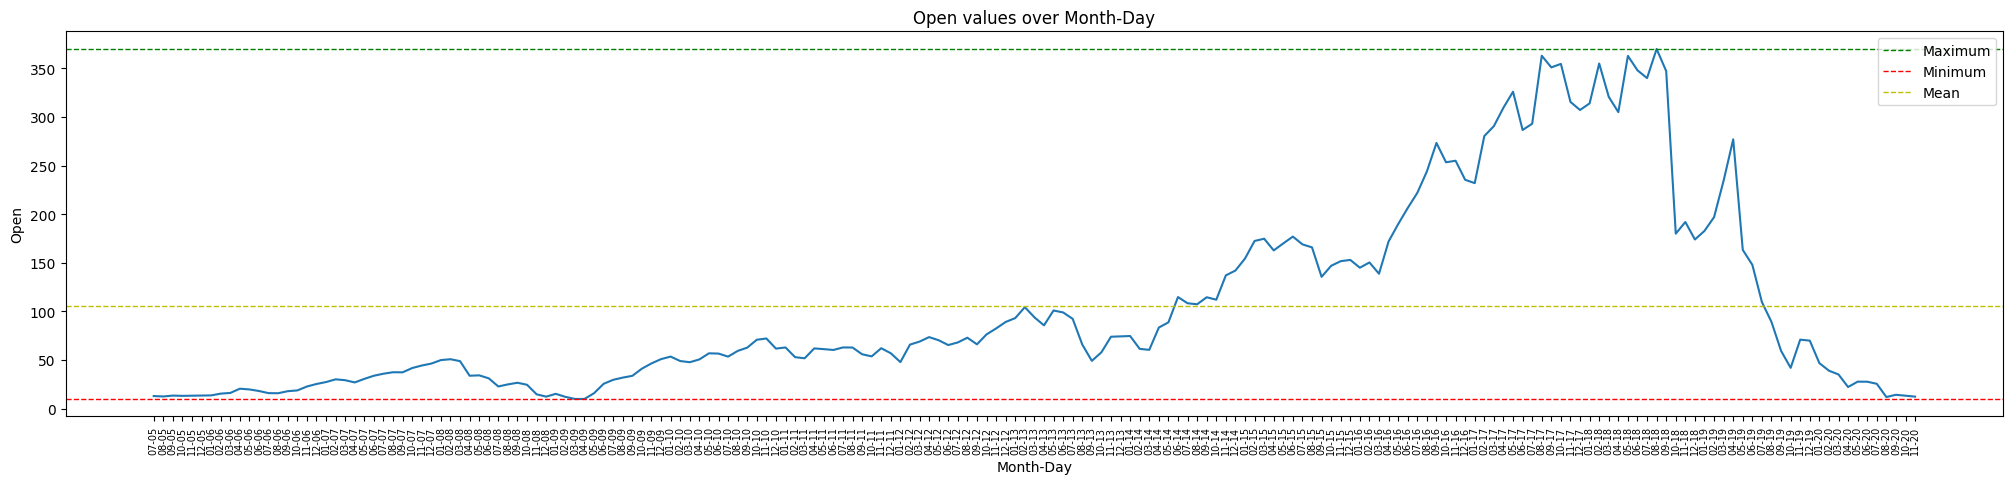

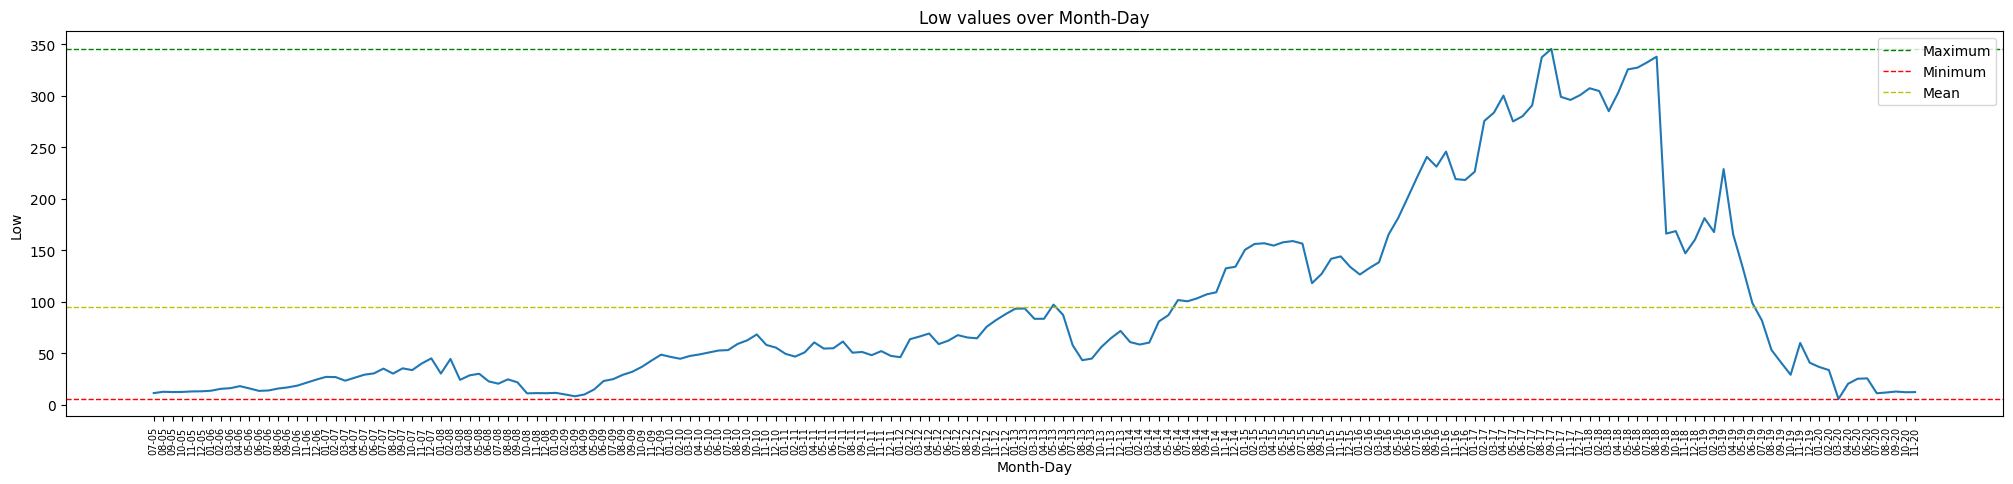

In [17]:
# Chart - 1 visualization code
for i in ['Close','High','Open','Low']:
  plt.figure(figsize=(25,5))
  plt.plot(df.MonthDay,df[i])
  plt.axhline(df[i].max(),color='g',linestyle='dashed',linewidth=1,label='Maximum')
  plt.axhline(df[i].min(),color='r',linestyle='dashed',linewidth=1,label='Minimum')
  plt.axhline(df[i].mean(),color='y',linestyle='dashed',linewidth=1,label='Mean')
  # plt.axvline(df['Close'].max(),color='g',linestyle='dashed',linewidth=1,label='Maximum')
  # plt.axvline(df['Close'].min(),color='r',linestyle='dashed',linewidth=1,label='Minimum')
  # plt.axvline(df['Close'].mean(),color='y',linestyle='dashed',linewidth=1,label='Mean')
  plt.xlabel('Month-Day')
  plt.xticks(rotation=90, fontsize=7)
  plt.ylabel(i)
  plt.title(i+' values over Month-Day')
  plt.legend(loc='upper right')
  plt.show()

##### 1. Why did you pick the specific chart?

* LineChart easily showing that trend of market

##### 2. What is/are the insight(s) found from the chart?

* Easily find out min,max,average price vs different variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Till auguest Month share price increasing then after price decreasing

#### Chart - 2-Check share price vs Date with considering all variable

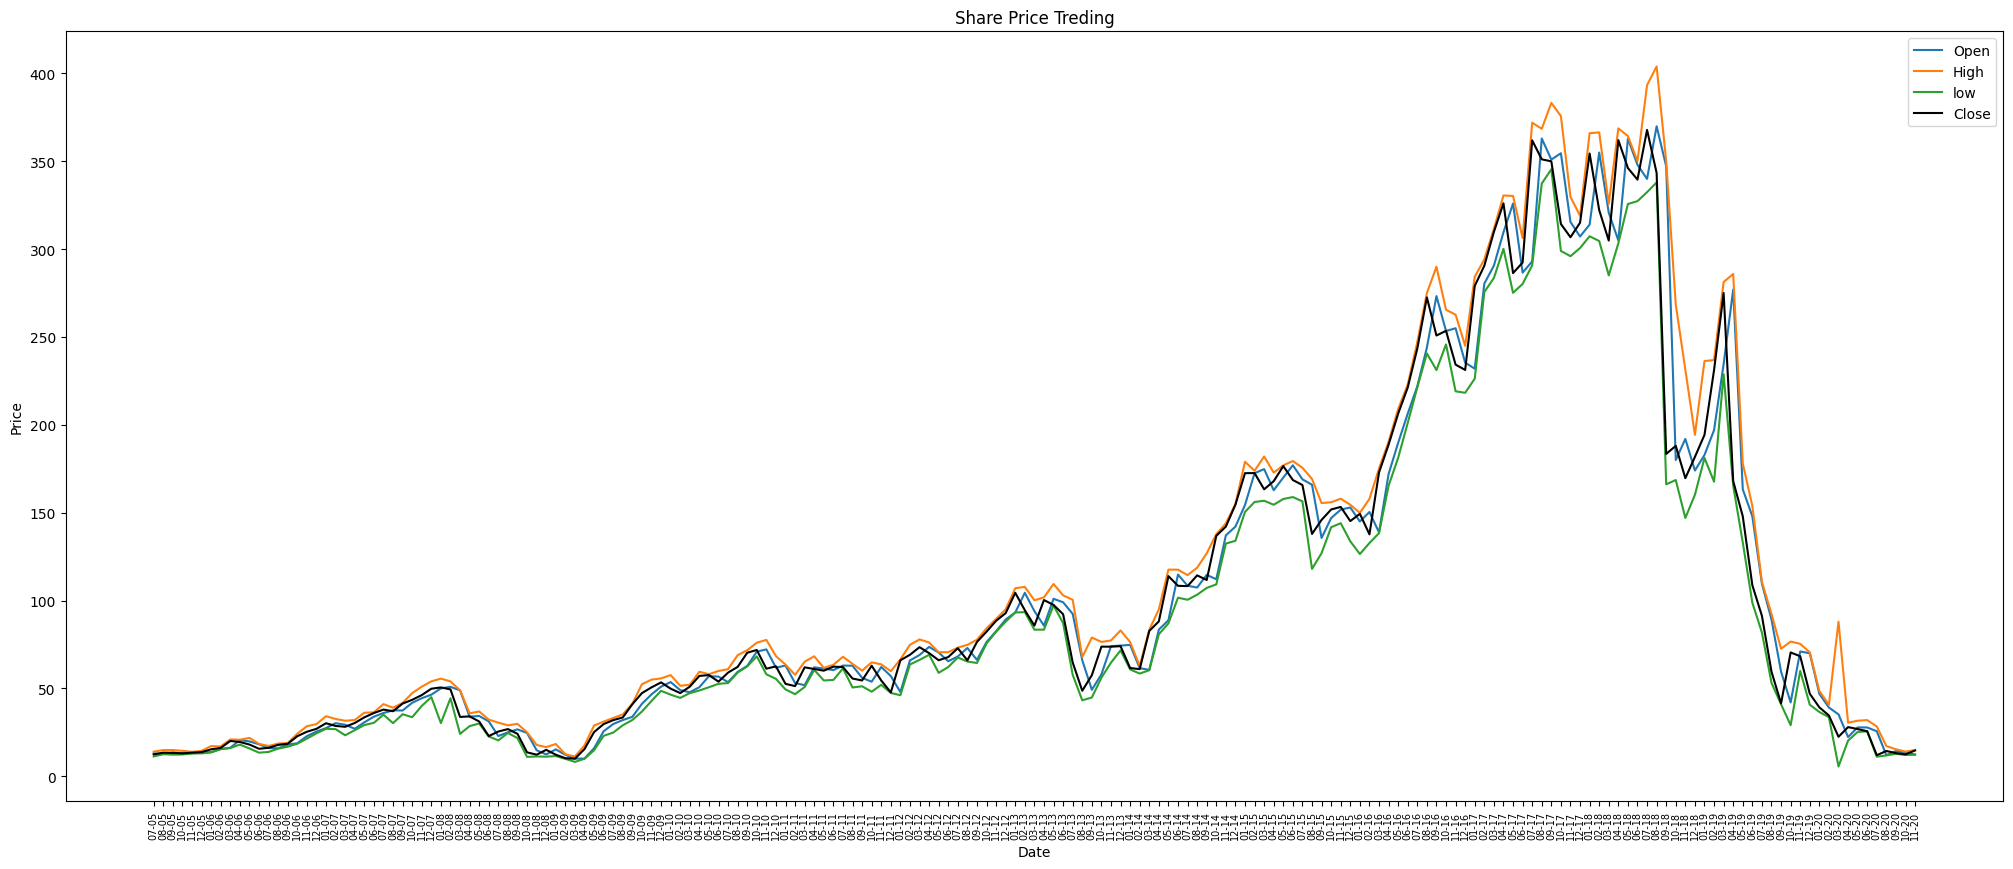

In [18]:
# Chart - 2 visualization code
plt.figure(figsize=(25,10))
plt.plot(df.MonthDay,df['Open'],label='Open')
plt.plot(df.MonthDay,df['High'],label='High')
plt.plot(df.MonthDay,df['Low'],label='low')
plt.plot(df.MonthDay,df['Close'],label='Close',color='black')
plt.xticks(rotation=90, fontsize=7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Share Price Treding')
plt.show()


##### 1. Why did you pick the specific chart?

* Above plot is easily showing that share price with respect to specific date and We directly say and compare that price above,below specific variable.

##### 2. What is/are the insight(s) found from the chart?

* Showing price with respect to specific date

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3- Month wise average rate of share

In [19]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [20]:
#check avg price of share month wise
a=df.groupby(df['Date'].dt.month)['Open', 'High', 'Low', 'Close'].mean()
print(a)

            Open        High         Low       Close
Date                                                
1     100.928000  117.346667   93.766000  108.774667
2     109.134667  116.035333   98.238667  107.760667
3     108.150667  123.670667   98.524000  113.014000
4     113.044000  125.709333  102.284667  114.450000
5     114.589333  122.090000  102.404667  112.874667
6     113.268000  118.471333  102.642000  109.661333
7     103.891250  117.493750   96.206250  108.322500
8     108.481875  116.064375   95.777500  103.386875
9     103.691875  114.283750   85.735625   93.343750
10     93.815625  109.928125   85.361875   97.399375
11     97.975000  105.645000   87.251875   94.671250
12    100.850000  107.654000   92.808000  100.724000


<Figure size 1500x700 with 0 Axes>

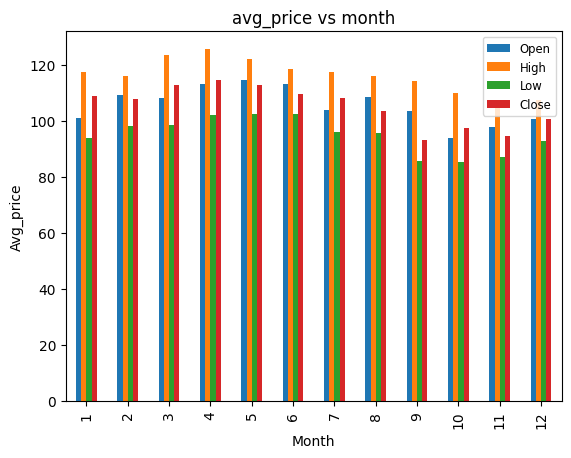

In [21]:
# Chart - 3 visualization code
plt.figure(figsize=(15,7))
a.plot(kind='bar')
plt.legend(fontsize='small')
plt.xlabel('Month')
plt.ylabel('Avg_price')
plt.title('avg_price vs month')
plt.show()

##### 1. Why did you pick the specific chart?

* It is comparing different varaible month wise and easy to analysis

##### 2. What is/are the insight(s) found from the chart?

* Lowest avg market open in month-10,highest-5
* Lowest avg market High in month-12,highest-4
* Lowest avg market Low in month-10,highest-4
* Lowest avg market Close in month-9,highest-4


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes,it show trend of market

#### Chart - 4 - avg share price day wise

In [22]:
df.groupby(df['Day'])['Open','High','Low','Close'].mean()

,Open,High,Low,Close
Day,,,,
Friday,97.522593,107.562222,88.124444,98.178148
Monday,113.370000,125.640385,106.511923,119.813846
Saturday,106.940769,115.905385,99.064615,107.440000
Sunday,113.059231,121.680000,100.339231,108.992308
Thursday,105.948462,116.746923,92.423077,101.603077
Tuesday,102.672963,113.494444,87.635556,98.396296
Wednesday,99.911111,112.277037,91.222963,102.640000


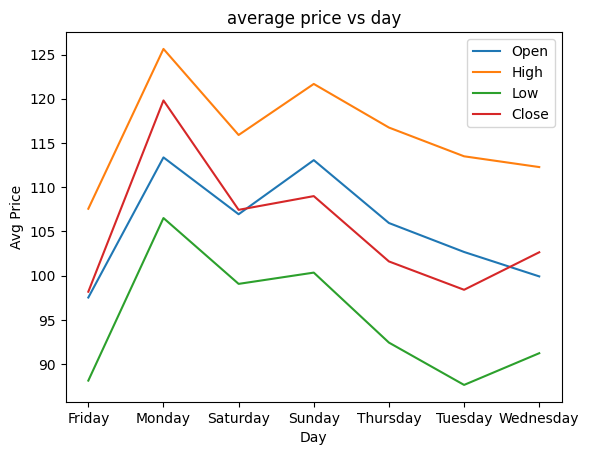

In [23]:
# Chart - 4 visualization code
# plot average price vs day
df.groupby(df['Day'])['Open','High','Low','Close'].mean().plot(kind='line')
plt.title('average price vs day')
plt.xlabel('Day')
plt.ylabel('Avg Price')
plt.show()

##### 1. Why did you pick the specific chart?

* It is showing that avg price of share day wise.

##### 2. What is/are the insight(s) found from the chart?

* highest avg price on Monday
* lowest avg price in Friday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes

#### Chart - 5-draw scatter plot for distribution

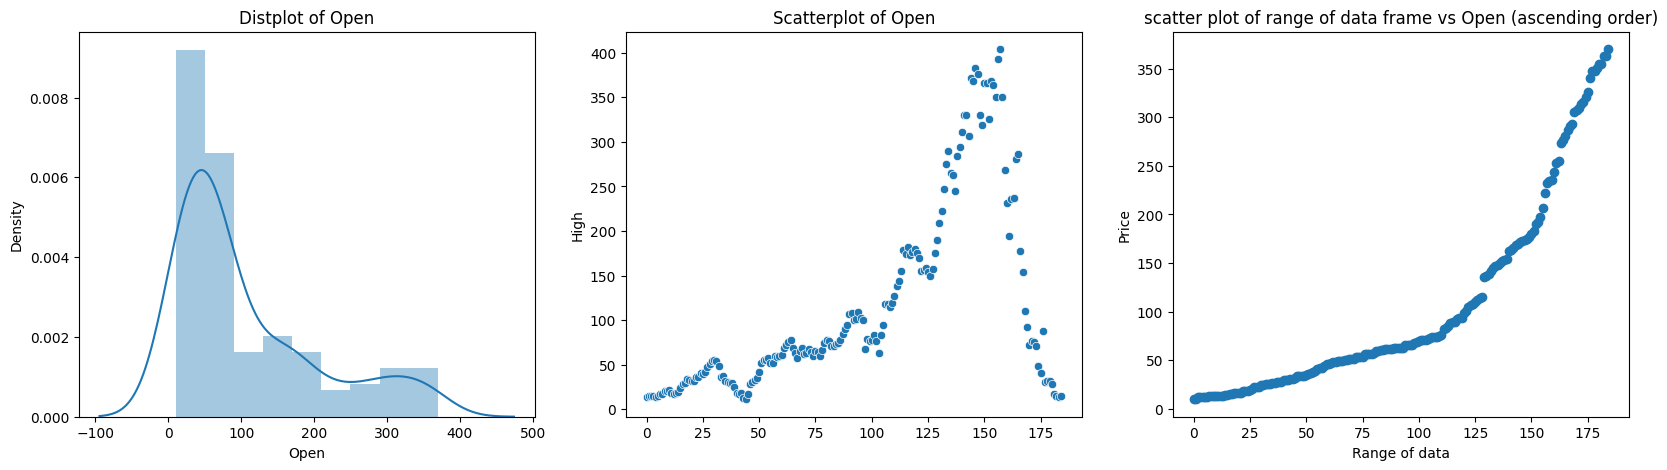

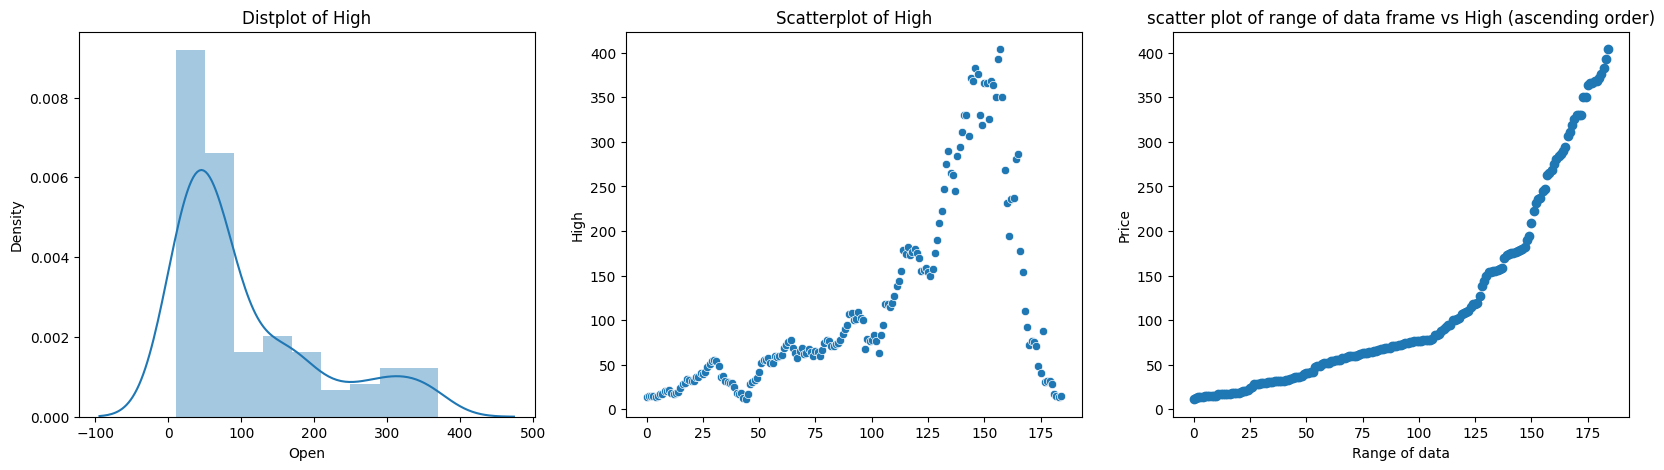

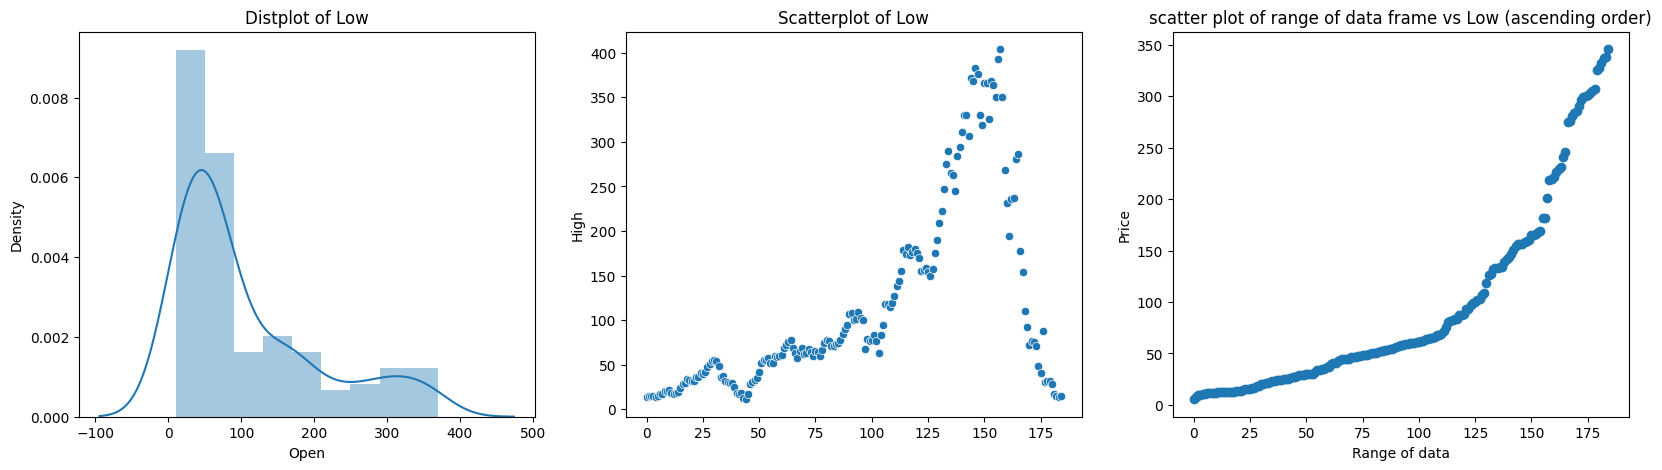

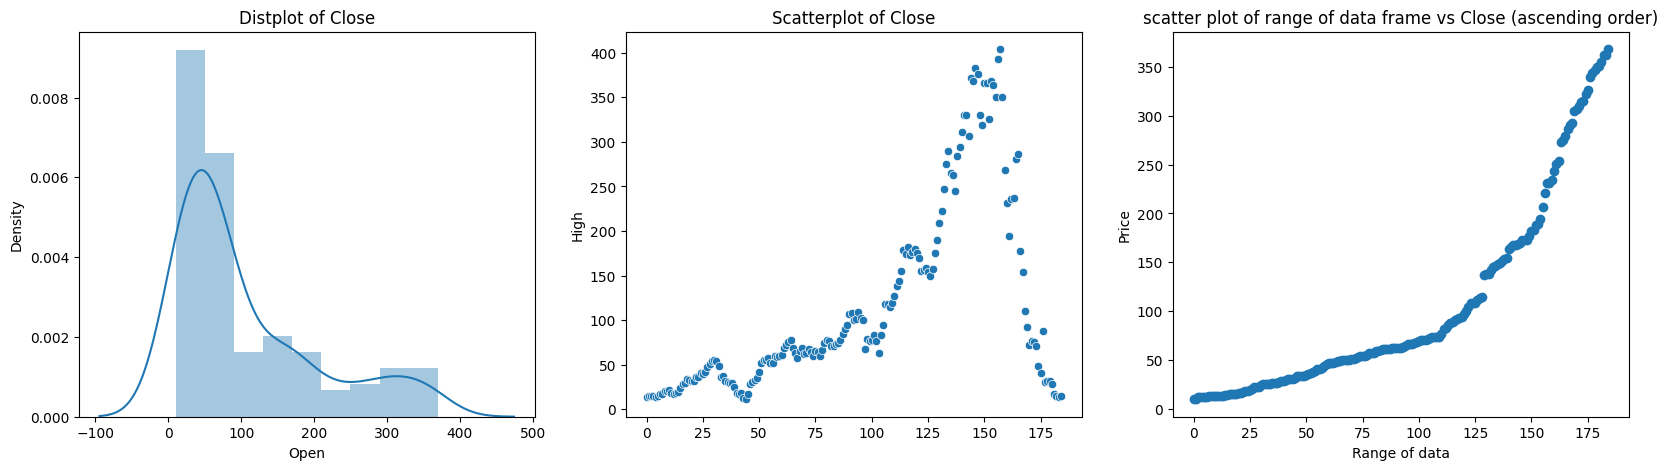

In [24]:
# Chart - 5 visualization code
for i in ['Open','High','Low','Close']:
  plt.figure(figsize=(20,5))

  plt.subplot(1,3,1)
  sns.distplot(df['Open'])
  plt.title('Distplot of '+i)

  plt.subplot(1,3,2)
  sns.scatterplot(df['High'])
  plt.title('Scatterplot of '+ i)

  plt.subplot(1,3,3)
  plt.scatter(range(len(df[i])),df[i].sort_values(ascending=True))
  plt.title('scatter plot of range of data frame vs ' + i +' (ascending order)')
  plt.xlabel('Range of data')
  plt.ylabel('Price')

  plt.show()

##### 1. Why did you pick the specific chart?

* It is showing that price distribution of different variable.

##### 2. What is/are the insight(s) found from the chart?

* All variable has right skew data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* all variable has price distribution is towards right hand side and when we design linear ml model then it is directly affect the output of our models.

#### Chart - 6

In [25]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [26]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [27]:
# Check correlation
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


<Axes: >

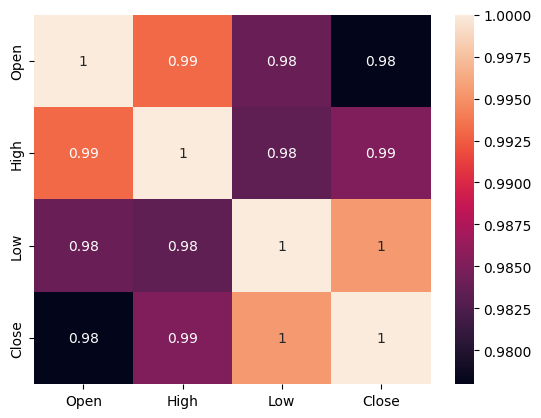

In [28]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(),annot=True)

##### 1. Why did you pick the specific chart?

* It is showing that correlation directly by differently colour shadding

##### 2. What is/are the insight(s) found from the chart?

* all variable are highly correlated to each other so it not good for linear regression types of models.

#### Chart - 15 - Pair Plot

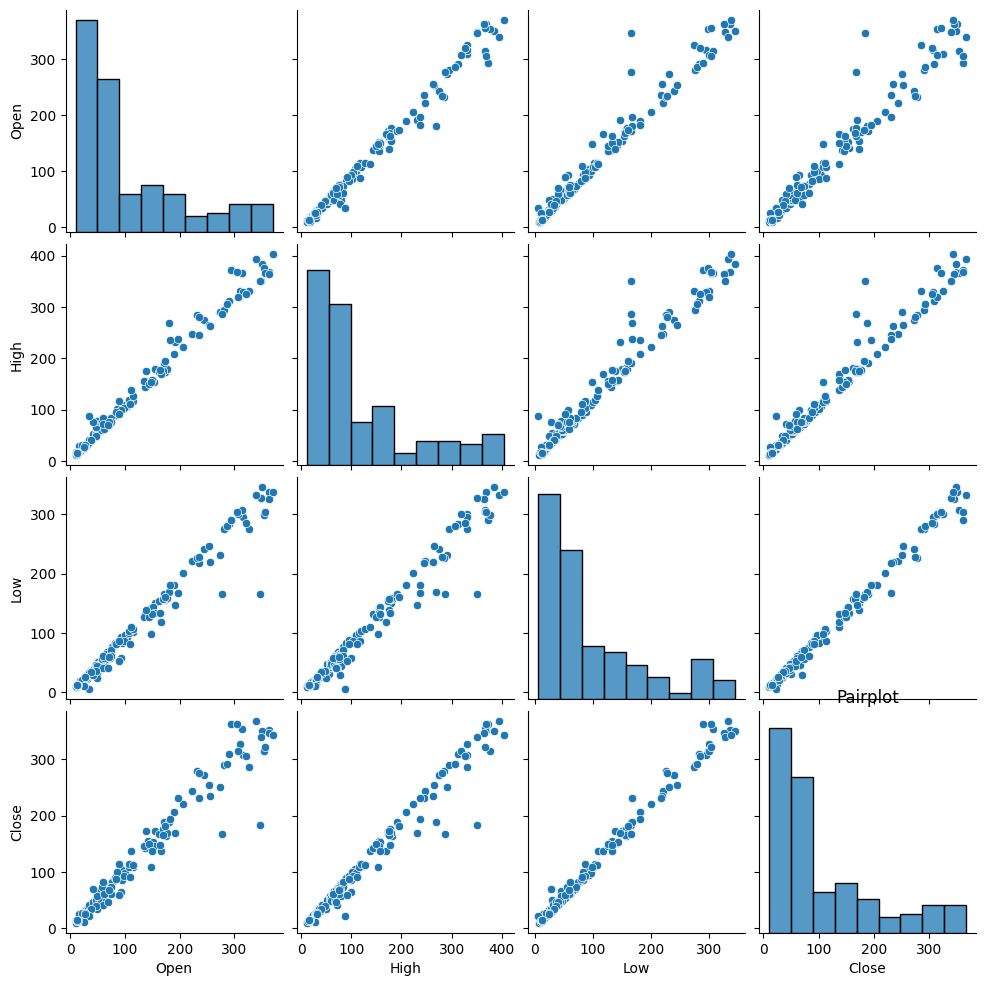

In [29]:
# Pair Plot visualization code
sns.pairplot(df)
plt.title('Pairplot')
plt.show()

##### 1. Why did you pick the specific chart?

* It is showing relation of one variable with others.

##### 2. What is/are the insight(s) found from the chart?

* all variable are highly correlated to each other.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
calculate_missing_value=df.isna().sum().sum()
print(f"In Given data there is total missing value is {calculate_missing_value}")


In Given data there is total missing value is 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

* there is no missing data so no need to do any imputation on it.

### 2. Handling Outliers

In [34]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Day', 'MonthDay'], dtype='object')

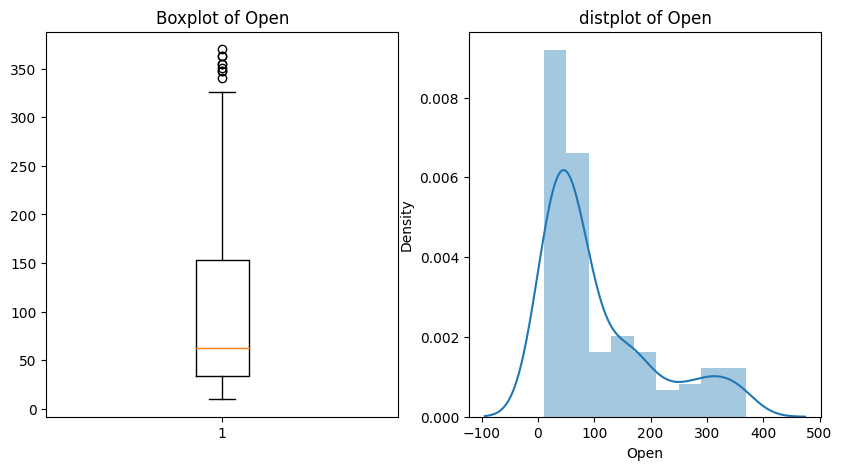

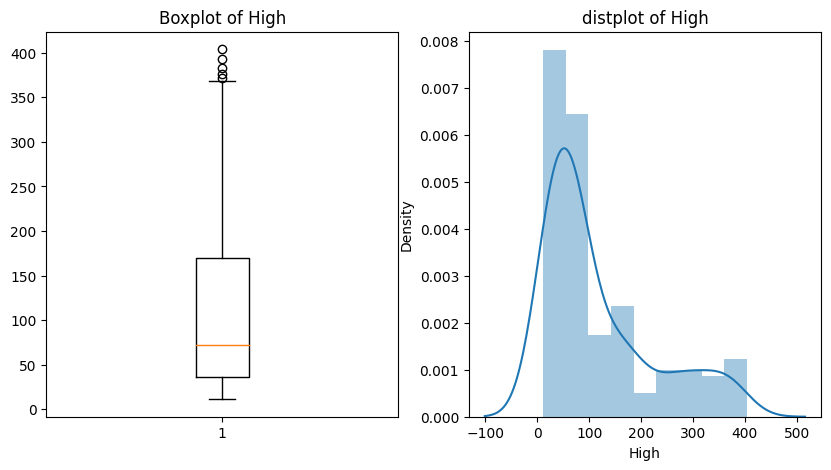

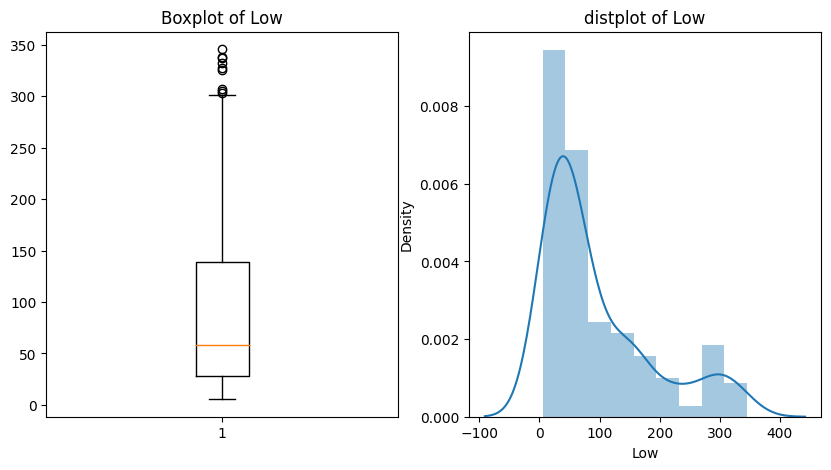

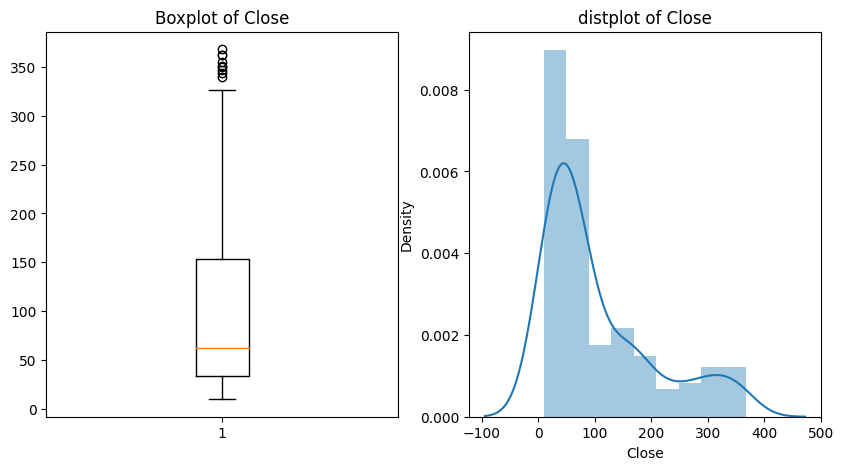

In [35]:
for i in ['Open', 'High', 'Low', 'Close']:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.boxplot(df[i])
  plt.title('Boxplot of '+i)

  plt.subplot(1,2,2)
  sns.distplot(df[i])
  plt.title('distplot of '+i)
  plt.show()


After scaling data check distribution


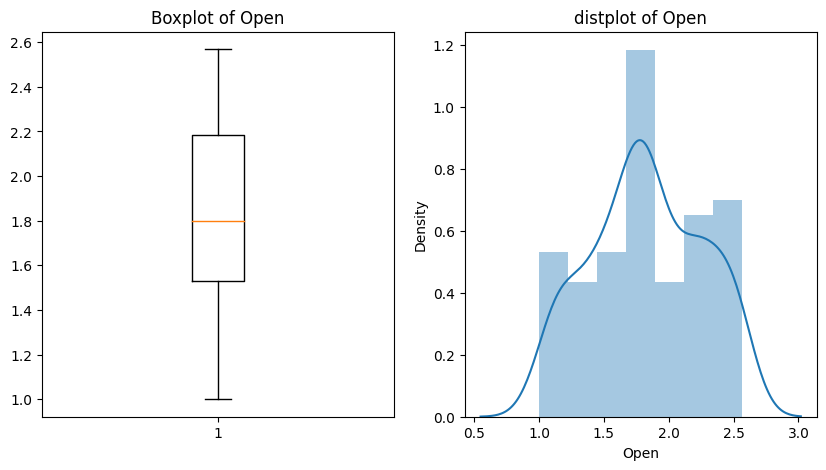

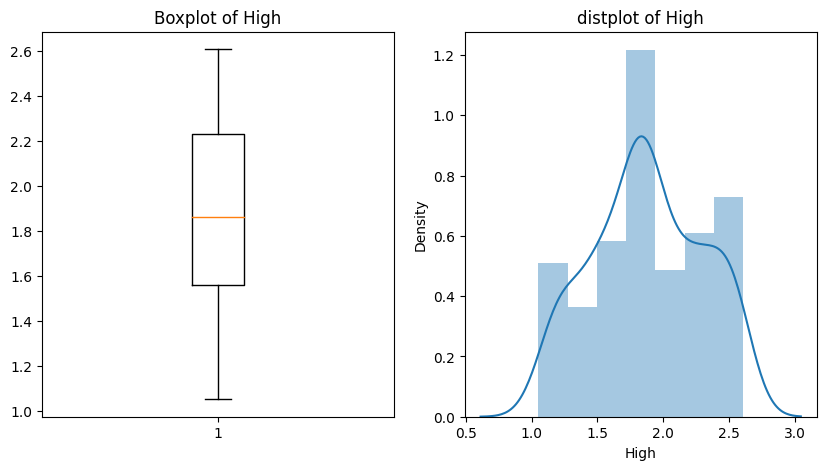

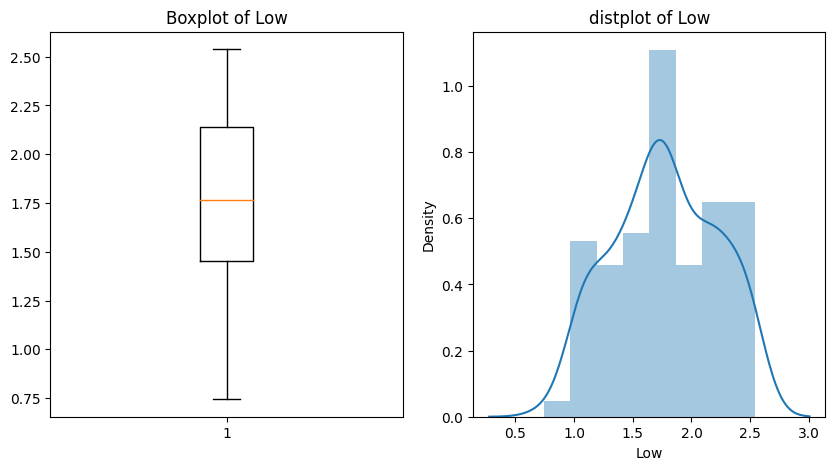

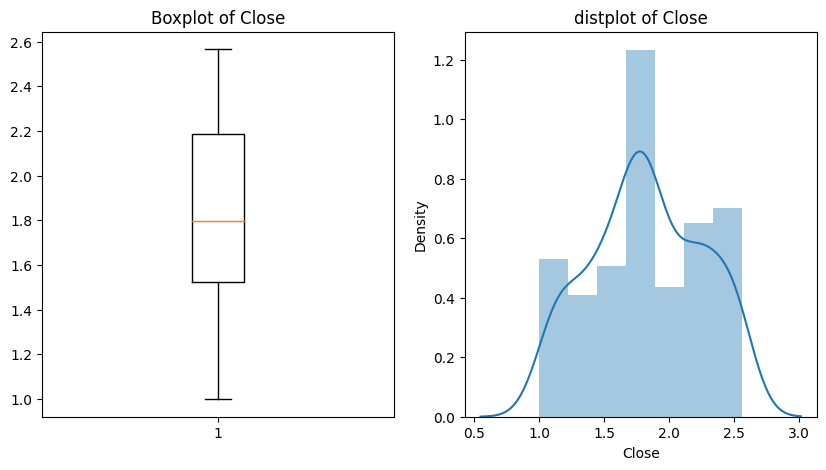

In [36]:
# Handling Outliers & Outlier treatments
#scalling data by using log10 and then check distribution of it

df[['Open', 'High', 'Low', 'Close']]=np.log10(df[['Open', 'High', 'Low', 'Close']])

print('After scaling data check distribution')

for i in ['Open', 'High', 'Low', 'Close']:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.boxplot(df[i])
  plt.title('Boxplot of '+i)

  plt.subplot(1,2,2)
  sns.distplot(df[i])
  plt.title('distplot of '+i)
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Tried simple Scalling method by applying log10 on data
* After scalling data outlier remove and data also more symmetrical to  normal distributed .

### 3. Categorical Encoding

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      185 non-null    datetime64[ns]
 1   Open      185 non-null    float64       
 2   High      185 non-null    float64       
 3   Low       185 non-null    float64       
 4   Close     185 non-null    float64       
 5   Day       185 non-null    object        
 6   MonthDay  185 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 10.2+ KB


In [71]:
#Create dummy columns to convert text data to int form
df=pd.get_dummies(df, columns=['Day'], prefix='Day',drop_first=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           185 non-null    datetime64[ns]
 1   Open           185 non-null    float64       
 2   High           185 non-null    float64       
 3   Low            185 non-null    float64       
 4   Close          185 non-null    float64       
 5   MonthDay       185 non-null    object        
 6   Day_Monday     185 non-null    uint8         
 7   Day_Saturday   185 non-null    uint8         
 8   Day_Sunday     185 non-null    uint8         
 9   Day_Thursday   185 non-null    uint8         
 10  Day_Tuesday    185 non-null    uint8         
 11  Day_Wednesday  185 non-null    uint8         
dtypes: datetime64[ns](1), float64(4), object(1), uint8(6)
memory usage: 9.9+ KB


In [74]:
df.head()

,Date,Open,High,Low,Close,MonthDay,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2018-07-05,1.113943,1.146128,1.051153,1.095518,07-05,0,0,0,1,0,0
1,2018-08-05,1.099681,1.172603,1.098644,1.127753,08-05,0,0,1,0,0,0
2,2018-09-05,1.129690,1.172311,1.088845,1.123852,09-05,0,0,0,0,0,1
3,2018-10-05,1.120574,1.160469,1.093422,1.113609,10-05,0,0,0,0,0,0
4,2018-11-05,1.125481,1.142389,1.109916,1.127429,11-05,1,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

* Used getdomies method to convert categorical (text data) into integer form (int)

### 4. Textual Data Preprocessing (Not required here)
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [40]:
# Expand Contraction

#### 2. Lower Casing

In [41]:
# Lower Casing

#### 3. Removing Punctuations

In [42]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords

In [45]:
# Remove White spaces

#### 6. Rephrase Text

In [46]:
# Rephrase Text

#### 7. Tokenization

In [47]:
# Tokenization

#### 8. Text Normalization

In [48]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [49]:
# POS Taging

#### 10. Text Vectorization

In [50]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif()

<Axes: >

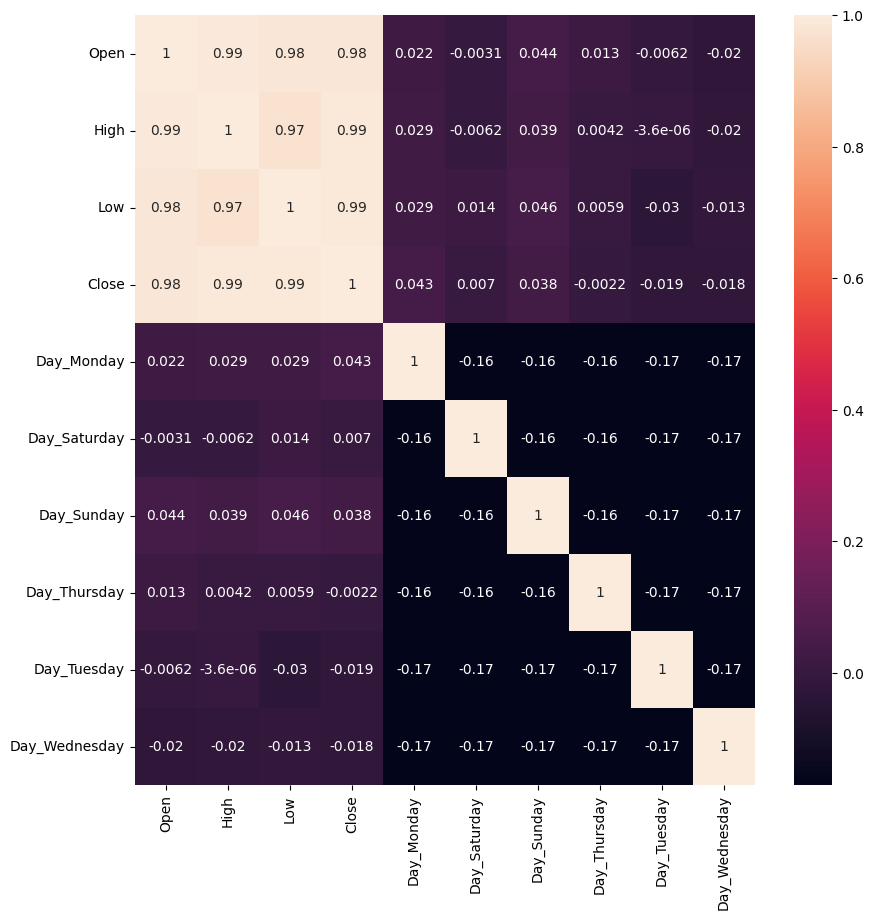

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [51]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [53]:
# Transform Your data

### 6. Data Scaling

In [54]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [55]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [56]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [57]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [58]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [63]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [66]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [67]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***